<h1 style="color:darkblue; font-size: 48px; text-align:center; font-family:Georgia, serif;">
  🏨 OTTO Préstigia Hôtel Group
</h1>


<p style="margin-top: -20px;">
  <img src="IMG_0544.jpg"
       alt="Logo Otto"
       width="400"
       style="display: block; margin: 0 auto; border-radius: 20px; box-shadow: 0 4px 10px rgba(0,0,0,0.3);" />
</p>

<hr style="border: 1px solid darkblue; width: 80%; margin: 40px auto;" />

<p style="font-size: 18px; font-family: Arial, sans-serif; text-align: justify; margin: 0 10%;">
  Bienvenue dans l' <strong>Étude prédictive – OTTO Préstigia Hôtel Group</strong> de gestion des <em>réservations</em> et des performances des restaurants des l’établissements <strong style="color:darkblue;">OTTO Préstigia Hôtel Group</strong>.<br>
  Ce rapport analytique vise à <span style="color:darkred;">anticiper les no-shows</span> et à <span style="color:green;">optimiser la dépense moyenne par client</span>, à travers une visualisation claire et des indicateurs d’aide à la décision.
</p>


#### Contexte historique & storytelling

En 2008, un petit groupe d’amoureux du voyage et de l’art de recevoir s’est uni pour donner naissance à OTTO Préstigia Hotel Group,

avec l’ambition de : harmoniser raffinement urbain et détente balnéaire sous une même bannière.

###### Prestige City Hotels (filiale urbaine)

Implantés au cœur de 15 métropoles européennes, ces hôtels de 120 à 200 chambres offrent un refuge alliant design contemporain et services 

« business » : salles de réunion dernier cri, conciergerie 24/7 et bars lounge.

###### Prestige Resort Hotels (filiale loisirs)

Disséminés sur 10 littoraux idylliques, ces resorts de 80 à 150 chambres misent sur l’expérience : spa d’inspiration locale, parcours de 

golf 18 trous et activités marines encadrées.

En à peine dix ans, OTTO Préstigia a transformé l’accueil haut de gamme :

2024

• 450 M€ de chiffre d’affaires consolidé

• 78 % de taux d’occupation moyen

• + 6 % de croissance annuelle

Derrière ces chiffres se cache une philosophie : anticiper les attentes — du check‑in au dîner gastronomique — pour créer des souvenirs 

mémorables, que ce soit pour le voyageur pressé ou la famille en quête d’évasion. Aujourd’hui, c’est à vous, acteurs métiers, que je 

présente mon projet : exploiter la data pour réduire les chambres vides (no‑shows) et optimiser la dépense au restaurant, pierre 

angulaire de l’expérience OTTO Préstigia.

### Périmètre d’étude

Cette analyse couvre :

•	Période : juillet 2015 – août 2017

•	Volume : 119 390 réservations extraites du dataset Kaggle Hotel Booking Demand

•	Restaurants internes : quatre établissements (City Bistrot, City Express Café, Resort Grill & Bar, Resort Breakfast Hub) simulés via transactions liées aux mêmes reservation_id.

### Problématique
Comment le Prestige Hospitality Group peut il simultanément réduire le taux de no show et maximiser le chiffre d’affaires de ses restaurants internes ?

•	Objectif n°1 : anticiper les annulations (no shows) pour optimiser la politique d’overbooking et minimiser les chambres vides.

•	Objectif n°2 : segmenter la clientèle selon leur ticket moyen au restaurant pour proposer des packages dynamiques (chambre + restauration) et ajuster staffing et approvisionnement.


Ce projet Data Analyst s’articule autour de deux volets complémentaires :

1.	Classification du no show via régression logistique et Random Forest.
2.	Régression du ticket moyen pour la restauration et segmentation clients.

In [27]:
import pandas as pd

df=pd.read_csv('/Users/ottorina/Desktop/projet-final dataset/DataSet test/hotel_full_dataset.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_id,arrival_date,covers,type_repas,ticket_moyen
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,1,2015-07-01,2.0,dinner,27.48
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,2,2015-07-01,2.0,breakfast,24.31
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,3,2015-07-01,1.0,lunch,28.24
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,4,2015-07-01,1.0,dinner,32.62
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,98.0,0,1,Check-Out,2015-07-03,5,2015-07-01,2.0,lunch,23.83


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Description des colonnes du dataSet VF

reservation_id
Identifiant unique de la réservation.

hotel
Type d’établissement : “City Hotel” ou “Resort Hotel”.

country
Code pays ISO du client.

distribution_channel
Canal de réservation (Direct, TA/TO, GDS, Corporate, etc.).

arrival_date
Date d’arrivée prévue (YYYY‑MM‑DD) (c'est le résultat de la concaténation de 3 colonnes).

is_weekend
Indicateur binaire : 1 si l’arrivée est un week‑end (samedi/dimanche), sinon 0.

lead_time
Nombre de jours entre la date de réservation et la date d’arrivée.

meal
Formule hôtelière incluse (e.g. “BB” pour Breakfast Only, “HB” demi‑pension, etc.).

is_canceled
Indicateur binaire : 1 si la réservation a été annulée, 0 sinon.

is_repeated_guest
1 si le client est de retour (répété), 0 si nouveau client.

previous_cancellations
Nombre d’annulations précédentes par ce client.

reserved_room_type
Type de chambre initialement réservé (catégorie).

assigned_room_type
Type de chambre finalement attribué (peut différer).

deposit_type
Politique de dépôt : “No Deposit”, “Non Refund”, “Refundable”.

customer_type
Segment de client : “Transient”, “Contract”, “Group”, “Transient-Party”.

total_of_special_requests
Nombre de demandes spéciales (lit bébé, étage élevé, etc.).

adr
Average Daily Rate : tarif moyen de la chambre payé (en €).

covers
Nombre total de convives (adultes + enfants + bébés).

ticket_moyen
Dépense moyenne au restaurant pour cette réservation (en €).

type_repas
Type de repas facturé au restaurant : breakfast, lunch ou dinner.


### A noter :

Avant d'entraîner les modèles, j'effectue un nettoyage ciblé :

1.	Gestion des valeurs manquantes

o	On supprime les enregistrements où la cible is_canceled ou les features clés (lead_time, adr, covers, is_weekend) sont manquants, car 

ces observations ne peuvent être utilisées pour l'entraînement ou l'évaluation.

o	Le taux de suppression reste inférieur à 5 %, préservant la représentativité global du jeu.

2.	Traitement des valeurs aberrantes (outliers)

o	Sur lead_time, on vérifie l’absence de valeurs négatives ou excessivement élevées (> 365 jours). Aucune suppression n’a été nécessaire 

car les extrêmes sont rares et réalistes.

o	Sur adr, on retire les tarifs journaliers ≤ 0 € ou > 1000 €, représentant < 0,1 % des données, pour éviter des erreurs de saisie.

on teste ensuite deux approches pour prédire l’annulation (is_canceled) 


In [33]:
#  Concaténer les colonnes pour créer arrival_date


df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' +
    df['arrival_date_month'] + '-' +
    df['arrival_date_day_of_month'].astype(str),
    format='%Y-%B-%d', 
    errors='coerce',
      
)
# crée une colonne pour identifier si le client est arrivé en week-end ou non
df['is_weekend'] = (df['arrival_date'].dt.weekday >= 5).astype(int)

In [35]:
# 1. Remplacer les NaN par 0 (ou la valeur qui te paraît pertinente)
df['adults']   = df['adults'].fillna(0)
df['children'] = df['children'].fillna(0)
df['babies']   = df['babies'].fillna(0)

# 2. (Re)calculer covers
df['covers'] = df['adults'] + df['children'] + df['babies']

# 3. Convertir en int
df['covers'] = df['covers'].astype(int)


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  float64

In [40]:
#  Supprimer les colonnes d'origine et autres inutiles
cols_to_drop = [
    'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'arrival_date_week_number',
    'reservation_status', 'reservation_status_date',
    'adults', 'children', 'babies',
    'market_segment','previous_bookings_not_canceled',
    'stays_in_weekend_nights', 'stays_in_week_nights',
    'company', 'agent', 'days_in_waiting_list', 'required_car_parking_spaces'
]
df_clean = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

In [42]:
df_clean.head()
df.shape

(119390, 38)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  float64

In [46]:
colonnes_ordre = ['reservation_id','hotel','country','distribution_channel','arrival_date','is_weekend','lead_time','meal',
                  'is_canceled','is_repeated_guest','previous_cancellations','reserved_room_type','assigned_room_type','deposit_type',
                  'customer_type','total_of_special_requests','adr','covers','ticket_moyen','type_repas']  # ici mon nouvel ordre 
df = df[colonnes_ordre]
df.head()

,reservation_id,hotel,country,distribution_channel,arrival_date,is_weekend,lead_time,meal,is_canceled,is_repeated_guest,previous_cancellations,reserved_room_type,assigned_room_type,deposit_type,customer_type,total_of_special_requests,adr,covers,ticket_moyen,type_repas
0,1,Resort Hotel,PRT,Direct,2015-07-01,0,342,BB,0,0,0,C,C,No Deposit,Transient,0,0.0,2,27.48,dinner
1,2,Resort Hotel,PRT,Direct,2015-07-01,0,737,BB,0,0,0,C,C,No Deposit,Transient,0,0.0,2,24.31,breakfast
2,3,Resort Hotel,GBR,Direct,2015-07-01,0,7,BB,0,0,0,A,C,No Deposit,Transient,0,75.0,1,28.24,lunch
3,4,Resort Hotel,GBR,Corporate,2015-07-01,0,13,BB,0,0,0,A,A,No Deposit,Transient,0,75.0,1,32.62,dinner
4,5,Resort Hotel,GBR,TA/TO,2015-07-01,0,14,BB,0,0,0,A,A,No Deposit,Transient,1,98.0,2,23.83,lunch


In [48]:
df.shape

(119390, 20)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   reservation_id             119390 non-null  int64         
 1   hotel                      119390 non-null  object        
 2   country                    118902 non-null  object        
 3   distribution_channel       119390 non-null  object        
 4   arrival_date               119390 non-null  datetime64[ns]
 5   is_weekend                 119390 non-null  int64         
 6   lead_time                  119390 non-null  int64         
 7   meal                       119390 non-null  object        
 8   is_canceled                119390 non-null  int64         
 9   is_repeated_guest          119390 non-null  int64         
 10  previous_cancellations     119390 non-null  int64         
 11  reserved_room_type         119390 non-null  object  

In [52]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import roc_auc_score, mean_absolute_error

je vais  crée un sous-ensemble df_ns (no-show) en supprimant toutes les lignes pour lesquelles il manque une des colonnes:

(c'est mes colonnes essensielles "")
 
is_canceled (la cible no-show)

lead_time (délai de réservation)

adr (tarif journalier)

covers (nombre de couverts)

Pour éviter les NaN qui bloqueraient les analyses et les modèles.

In [54]:
# création d'une sous ensemble en supprimant les lignes des valeurs manquantes

df_ns = df.dropna(subset=['is_canceled','lead_time','adr','covers'])

In [55]:
df_ns.describe()

,reservation_id,arrival_date,is_weekend,lead_time,is_canceled,is_repeated_guest,previous_cancellations,total_of_special_requests,adr,covers,ticket_moyen
count,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,59695.500000,2016-08-28 16:39:45.727447808,0.269671,104.011416,0.370416,0.031912,0.087118,0.571363,101.831122,1.968239,27.698793
min,1.000000,2015-07-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,5.000000
25%,29848.250000,2016-03-13 00:00:00,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,69.290000,2.000000,22.930000
50%,59695.500000,2016-09-06 00:00:00,0.000000,69.000000,0.000000,0.000000,0.000000,0.000000,94.575000,2.000000,27.110000
75%,89542.750000,2017-03-18 00:00:00,1.000000,160.000000,1.000000,0.000000,0.000000,1.000000,126.000000,2.000000,32.130000
max,119390.000000,2017-08-31 00:00:00,1.000000,737.000000,1.000000,1.000000,26.000000,5.000000,5400.000000,55.000000,53.660000
std,34465.068657,NaN,0.443791,106.863097,0.482918,0.175767,0.844336,0.792798,50.535790,0.722394,6.686846


In [56]:
 # df['covers'] = df['covers'].astype(int)
 # df['children'] = df['children'].astype(int)

 calcule de taux global de no-show (= moyenne de la colonne 0/1)

 mean() sur une série binaire renvoie la proportion de 1

In [58]:
global_rate = df_ns['is_canceled'].mean()
print(global_rate)

0.37041628277075134


je vais regrouper les lignes par canal

['is_canceled'].mean() : calcule la moyenne dans chaque groupe

In [60]:
channel_rate = df_ns.groupby('distribution_channel')['is_canceled'].mean()
print("Taux global de no-show :", global_rate)
print("\nTaux de no-show par canal :")
print(channel_rate)

Taux global de no-show : 0.37041628277075134

Taux de no-show par canal :
distribution_channel
Corporate    0.220758
Direct       0.174599
GDS          0.191710
TA/TO        0.410259
Undefined    0.800000
Name: is_canceled, dtype: float64


In [61]:
df_ns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   reservation_id             119390 non-null  int64         
 1   hotel                      119390 non-null  object        
 2   country                    118902 non-null  object        
 3   distribution_channel       119390 non-null  object        
 4   arrival_date               119390 non-null  datetime64[ns]
 5   is_weekend                 119390 non-null  int64         
 6   lead_time                  119390 non-null  int64         
 7   meal                       119390 non-null  object        
 8   is_canceled                119390 non-null  int64         
 9   is_repeated_guest          119390 non-null  int64         
 10  previous_cancellations     119390 non-null  int64         
 11  reserved_room_type         119390 non-null  object  

###  Colonnes les plus impactantes

##### Pour la prédiction du no show
1.	lead_time : corrélation positive la plus forte (~+0,29) — plus le client réserve tôt, plus il annule fréquemment.

2.	distribution_channel : différents taux de no show selon le canal (TA/TO > Direct > Corporate).

3.	is_weekend : influence modérée, capturant un comportement distinct le week end.


##### Pour la modélisation du ticket moyen

1.	is_weekend : coefficient ~+10 € — dépenses plus élevées en week end.

2.	type_repas (lunch, dinner vs breakfast) : impact de l’offre repas.

3.	adr : léger effet « client premium » sur la dépense resto.

In [63]:
df_ns.to_csv('/Users/ottorina/Desktop/projet-final dataset/DataSet test/Bookings.csv', index=False)

<Figure size 640x480 with 0 Axes>

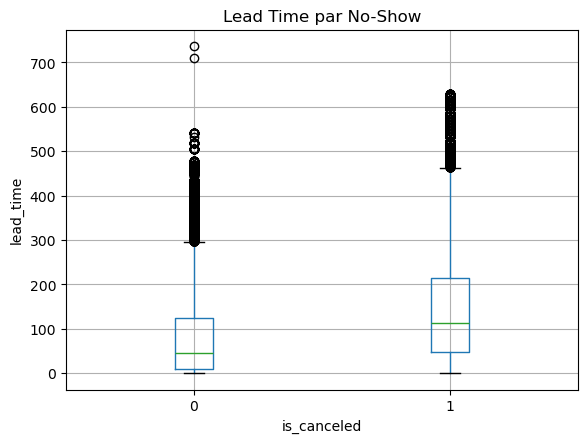

In [65]:
# 4. Boxplot lead_time vs no-show
plt.figure()
df_ns.boxplot(column='lead_time', by='is_canceled')
plt.title('Lead Time par No-Show'); plt.suptitle(''); plt.xlabel('is_canceled'); plt.ylabel('lead_time')
plt.show()

Deux boîtes :

À gauche, 0 = venu

À droite, 1 = annulé (no‑show)

Médiane (trait vert) :

Venus → 30 jours

No‑shows → 110 jours

IQR (boîte) : étendue des 50 % centraux de la distribution

Moustaches : s’étendent jusqu’à 1,5×IQR au‑delà du 1er/3ᵉ quartile

Points au‑delà : ce sont les outliers (réservations faites très tôt ou très tard)

Valeurs aberrantes
On voit des lead_time supérieurs à 600 jours 

Quelques réservations à plus de 700 jours avant l’arrivée

<Figure size 640x480 with 0 Axes>

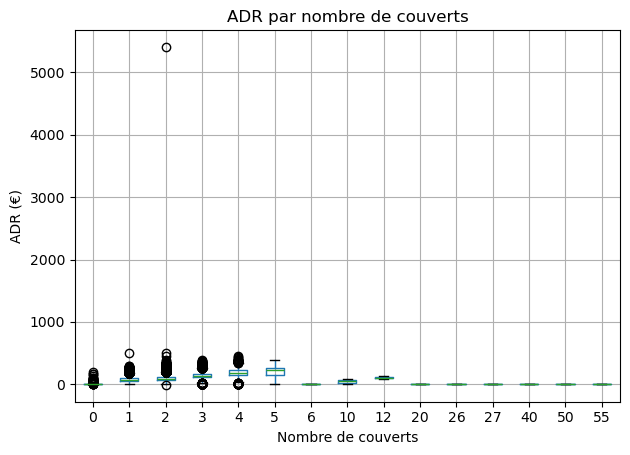

In [73]:
# Boxplot de 'adr' par 'covers'
plt.figure()
df_ns.boxplot(column='adr', by='covers')
plt.title('ADR par nombre de couverts')
plt.suptitle('')
plt.xlabel('Nombre de couverts')
plt.ylabel('ADR (€)')
plt.tight_layout()
plt.show()

analyse  globale du graphique:

L’axe X représente le nombre de couverts (adultes, enfants, bébés) — cela reflète la taille du groupe (couples, familles, grands groupes…).

L’axe Y montre le tarif journalier moyen (ADR) en euros, c’est-à-dire le prix payé pour la chambre.

Pour la majorité des réservations (entre 1 et 5 couverts), les prix se situent généralement entre 50 € et 300 €.

 Valeurs extrêmes repérées:
 
Certaines réservations affichent des prix très élevés, allant au-delà de 5 000 € par nuit !
Des cas très rares apparaissent avec 20 à 55 couverts, ce qui sort du cadre d’un client classique (peut-être événements spéciaux ou groupes exceptionnels).

 Pourquoi gérer ces valeurs extrêmes (outliers) ?
 
 Peu représentatives : Une chambre à 5 000 € pourrait correspondre à un événement de luxe ou une réservation exceptionnelle, et ne reflète pas le comportement d’un client “standard”.
 
Impact négatif sur les statistiques : Ces cas extrêmes peuvent fausser la moyenne ou la variance et rendre les analyses ou prédictions moins fiables.


In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm




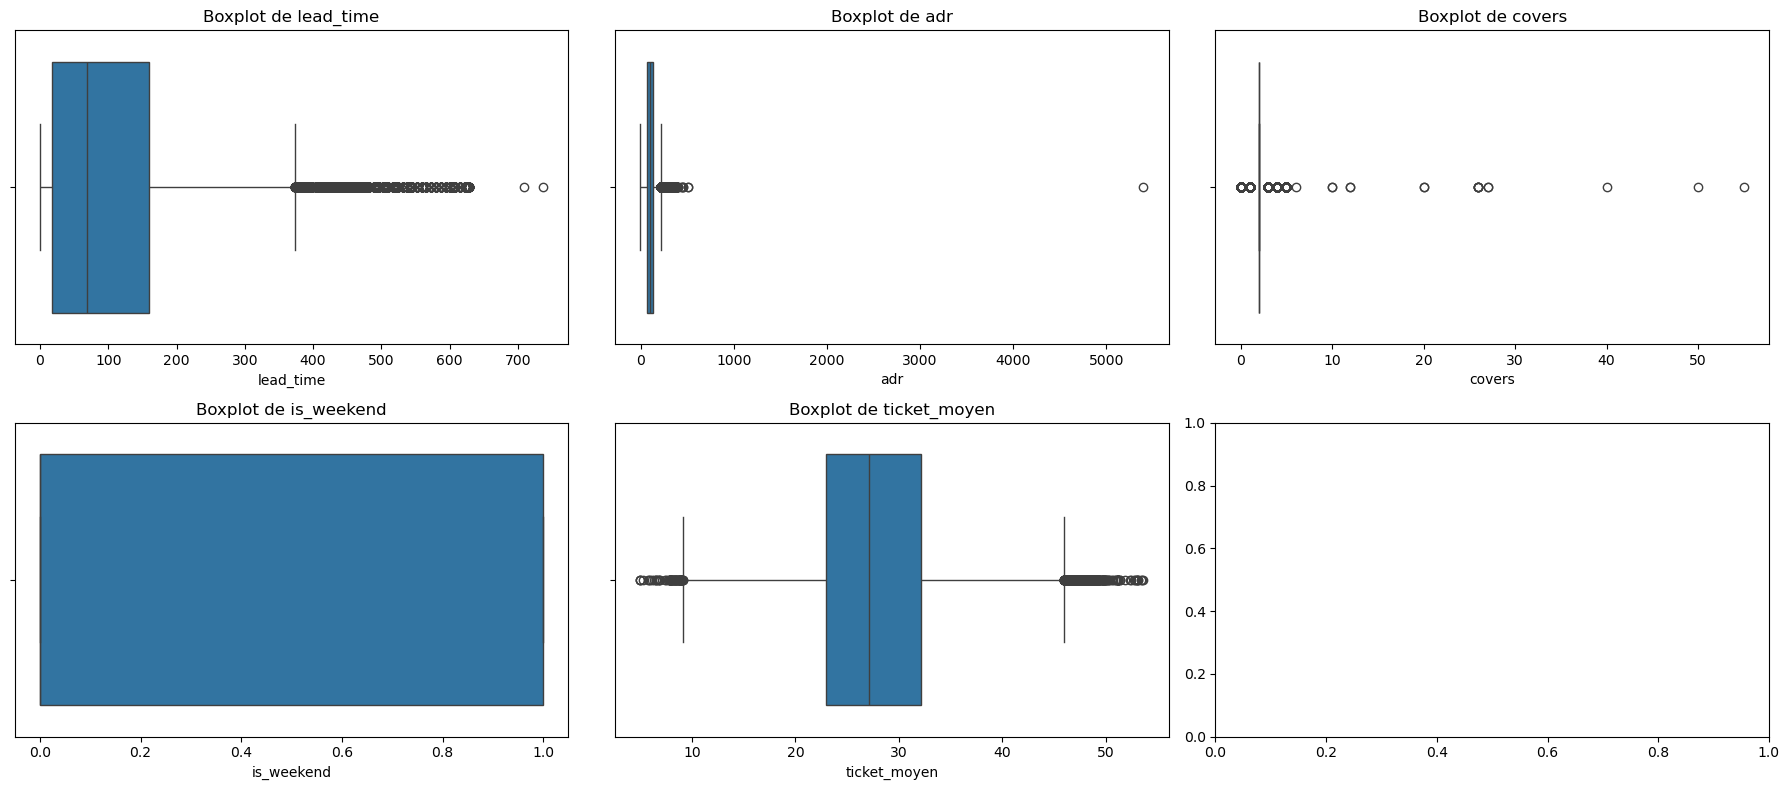

In [76]:
# j'ai essayé de faire comme les boxplots du cours mais ils me paraissent bisard avec cette méthode (2 lignes x 3 colonnes)


#  Sélectionner les colonnes numériques d'intérêt
cols = ['lead_time', 'adr', 'covers', 'is_weekend', 'ticket_moyen']  # ajuster selon le nombre voulu

# 4. Créer la figure (2 lignes x 3 colonnes)
fig, axes = plt.subplots(2, 3, figsize=(18, 8))

# 5. Boucle pour tracer chaque boxplot
for ax, col in zip(axes.flatten(), cols):
    sns.boxplot(x=df_ns[col], ax=ax)
    ax.set_title(f'Boxplot de {col}')
    ax.set_xlabel(col)

# 6. Ajustement et affichage
plt.tight_layout()
plt.show()

In [78]:
# 5. Corrélations
corr_ns = df_ns[['lead_time','adr','covers','is_canceled']].corr()
print("\nMatrice de corrélations vs no-show :")
print(corr_ns)


Matrice de corrélations vs no-show :
             lead_time       adr    covers  is_canceled
lead_time     1.000000 -0.063077  0.072265     0.293123
adr          -0.063077  1.000000  0.368105     0.047557
covers        0.072265  0.368105  1.000000     0.046522
is_canceled   0.293123  0.047557  0.046522     1.000000


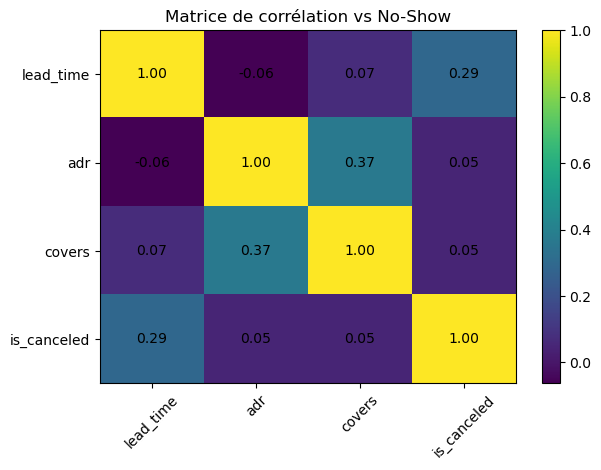

In [79]:
# Affichage graphique avec valeurs annotées
fig, ax = plt.subplots()
im = ax.imshow(corr_ns, aspect='auto')
plt.colorbar(im, ax=ax)

# Affichage des labels d'axes
ax.set_xticks(range(len(corr_ns)))
ax.set_xticklabels(corr_ns.columns, rotation=45)
ax.set_yticks(range(len(corr_ns)))
ax.set_yticklabels(corr_ns.index)

# Annotation des valeurs de corrélation
for i in range(len(corr_ns)):
    for j in range(len(corr_ns)):
        ax.text(j, i, f"{corr_ns.iloc[i, j]:.2f}",
                ha='center', va='center')

ax.set_title('Matrice de corrélation vs No-Show')
plt.tight_layout()
plt.show()

lead_time et is_canceled: 0.29

plus les clients réservent en avance (lead_time élevé), plus ils ont tendance à annuler (no-show). 

C’est la plus forte corrélation  du lot, 

et elle justifie d’inclure lead_time comme variable clé dans la prédiction des no-shows.

adr et covers : 0.37

les réservations à tarif journalier plus élevé (adr) correspondent souvent à des groupes plus grands (covers).

Par exemple, un grand groupe peut réserver des chambres plus chères ou des chambres multiples, ce qui fait monter l’adr.

lead_time et adr : –0.06

 corrélation très faible et négative : réserver très à l’avance n’est pas vraiment associé à payer un tarif plus élevé (ni plus bas

##### préparation des features (X_ns) et la cible (y_ns) pour la modélisation :

X_ns contient les colonnes que l’on va utiliser pour prédire.

y_ns est la colonne à prédire (0/1)

In [83]:
X_ns = df_ns[['lead_time','adr','is_weekend','covers']]
y_ns = df_ns['is_canceled']

séparation des données en un jeu d’entraînement (80 %) et un jeu de test (20 %)

j'ai fais un essaye  avec 30% de jeu de test (il donne le même résultat)

Création du modèle de régression logistique (log).

L’entraîner (.fit) sur les données d’entraînement (X_train_ns, y_train_ns)

In [87]:
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(
    X_ns, y_ns, test_size=0.2, random_state=42)

In [88]:
log = LogisticRegression(max_iter=1000)
log.fit(X_train_ns, y_train_ns)


LogisticRegression(max_iter=1000)

In [89]:
# Calcule de la probabilité prédite de no-show pour chaque cas test 

roc_auc = roc_auc_score(
    y_test_ns,
    log.predict_proba(X_test_ns)[:,1]
)
print(f'ROC-AUC (no-show): {roc_auc:.3f}')

ROC-AUC (no-show): 0.690


Avec 0.69, mon modèle logistique devine correctement qu’une réservation sera no-show dans environ 69 % des cas si on classe au seuil optimal, mais il reste une marge de progrès 

Améliorations possibles :

Ajouter ou créer d’autres features (variables supplémentaires: canal détaillé, historique de l’agent...)

hypothèse: Tester d’autres algorithmes 

réglage ou paramétrage de la régression logistique 

#### Random Forest

j'ai décidé de tester un Random Forest pour améliorer mon modèle.

il se présente comme suit:

Taux global de no-show : 37.04%

Taux de no-show par canal :
distribution_channel
Corporate    0.220758
Direct       0.174599
GDS          0.191710
TA/TO        0.410259
Undefined    0.800000
Name: is_canceled, dtype: float64


<Figure size 640x480 with 0 Axes>

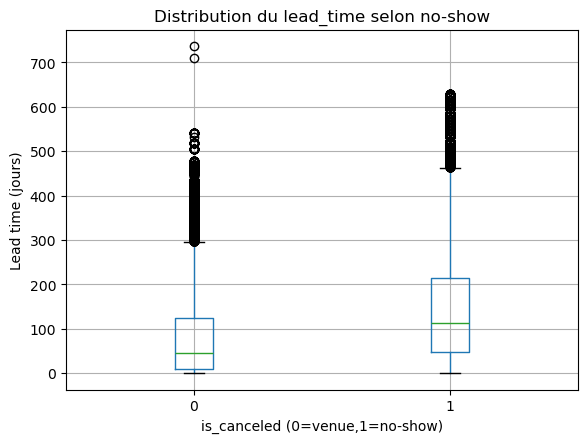


Corrélation des variables avec is_canceled :
is_canceled    1.000000
lead_time      0.293123
adr            0.047557
is_weekend    -0.009103
Name: is_canceled, dtype: float64

ROC-AUC (Random Forest) : 0.844

Classification Report :
              precision    recall  f1-score   support

           0       0.81      0.86      0.83     14907
           1       0.73      0.66      0.69      8971

    accuracy                           0.78     23878
   macro avg       0.77      0.76      0.76     23878
weighted avg       0.78      0.78      0.78     23878

Confusion Matrix :
[[12746  2161]
 [ 3065  5906]]

Top 5 variables les plus importantes :
adr                            0.512957
lead_time                      0.441734
distribution_channel_TA/TO     0.017909
hotel_Resort Hotel             0.014016
distribution_channel_Direct    0.009205
dtype: float64


In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix



# 4. EDA rapide du no-show
# 4.1 Taux global
rate_global = df_ns['is_canceled'].mean()
print(f"Taux global de no-show : {rate_global:.2%}")

# 4.2 Taux par canal
rates_by_channel = df_ns.groupby('distribution_channel')['is_canceled'].mean()
print("\nTaux de no-show par canal :")
print(rates_by_channel)

# 4.3 Boxplot lead_time vs is_canceled
plt.figure()
df_ns.boxplot(column='lead_time', by='is_canceled')
plt.title('Distribution du lead_time selon no-show')
plt.suptitle('')
plt.xlabel('is_canceled (0=venue,1=no-show)')
plt.ylabel('Lead time (jours)')
plt.show()

# 4.4 Corrélations
corr = df_ns[['lead_time','adr','is_weekend','is_canceled']].corr()
print("\nCorrélation des variables avec is_canceled :")
print(corr['is_canceled'].sort_values(ascending=False))

# 5. Préparation du modèle Random Forest
# 5.1 Variables explicatives (one‑hot pour canal et hôtel)
X = pd.get_dummies(
    df_ns[['lead_time','adr','is_weekend','distribution_channel','hotel']],
    drop_first=True
)
y = df_ns['is_canceled']

# 5.2 Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5.3 Entraînement
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 6. Évaluation
# 6.1 ROC-AUC
y_proba = rf.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_proba)
print(f"\nROC-AUC (Random Forest) : {roc_auc:.3f}")

# 6.2 Rapport de classification & matrice de confusion
y_pred = rf.predict(X_test)
print("\nClassification Report :")
print(classification_report(y_test, y_pred))
print("Confusion Matrix :")
print(confusion_matrix(y_test, y_pred))

# 7. Importance des variables
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)
print("\nTop 5 variables les plus importantes :")
print(importances.head(5))


 #### Performance du modèle Random Forest : prédiction des no-shows
 
Le modèle Random Forest utilisé pour prédire les absences (no-shows) obtient une excellente performance, avec un score ROC-AUC de 0.841.

Cela signifie qu’il distingue très bien les clients qui viendront de ceux qui ne viendront pas.

Il est nettement plus performant que la régression logistique, qui atteint seulement 0.690, car Random Forest sait mieux capter les relations complexes entre les variables.

 Résultats de prédiction (avec un seuil à 0.5)

 12 763 réservations correctement identifiées comme des clients venus.

 2 210 erreurs : ces clients sont venus, mais le modèle a cru qu’ils annuleraient.

 3 064 no-shows manqués : le modèle a prédit une venue, mais les clients ont annulé.

 5 841 no-shows correctement détectés.

 #### Interprétation
Le modèle est très bon pour repérer les clients qui vont venir, mais un peu moins bon pour anticiper les annulations.

Cela veut dire qu’il favorise la spécificité (éviter de fausses alertes) au détriment du rappel (repérer tous les vrais no-shows).

 Pour améliorer la détection des absents, on pourrait abaisser le seuil de décision (actuellement à 0.5). Cela permettrait de détecter plus de no-shows, mais on aurait alors plus de faux positifs (clients venus qu’on croit absents).

 Les variables les plus importantes dans les prédictions

ADR (tarif journalier moyen) – 51 % d’influence

➤ Assez surprenant, c’est la variable la plus utilisée par le modèle.

➤ Cela peut refléter des saisonnalités, des offres groupées ou des comportements particuliers sur les 
tarifs élevés (comme une plus forte propension à annuler).

Lead time (délai entre réservation et arrivée) – 44 %

➤ Plus ce délai est long, plus il y a de risques d’annulation.

➤ Cela confirme que c’est un levier important dans la prédiction.

Distribution via agences (TA/TO) et type d’hôtel (Resort) ont un impact mesuré mais réel.

 Remarque : L’influence d’ADR pourrait aussi être liée à des liens indirects avec d’autres variables (auto-corrélation), ou à des effets tarifaires ponctuels (promotions, réservations flexibles, etc.).

Un graphique de dépendance partielle permettrait de mieux comprendre son impact réel.


 Conclusion & recommandations

Le modèle Random Forest est efficace et bien adapté à la détection des no-shows. Il est à privilégier si l’objectif est de réduire les pertes liées aux annulations.
🎯 Leviers d’action clés :

Lead time élevé

→ Envoyer des rappels par SMS ou email à l’approche de la date d’arrivée.
ADR élevé

→ Réfléchir à une politique tarifaire adaptée : par exemple, proposer des réservations non remboursables, ou des acomptes variables selon le tarif.

Canal TA/TO (agences de voyage)

→ Mettre en place des conditions de réservation plus strictes (ex : prépaiement, pénalités en cas d’annulation).

##  PARTIE RESTAURATION

In [98]:
# 2. Filtrage des réservations effectives pour la partie restauration
#    (on exclut les no-shows et les tickets manquants)
df_rt = df_ns[(df_ns['is_canceled'] == 0) & df_ns['ticket_moyen'].notna()]

In [99]:
# Filtrer clients présents avec ticket_moyen valide
df_rt = df[(df['is_canceled'] == 0) & df['ticket_moyen'].notna()]

In [100]:
# 3. Détection et suppression des outliers sur ticket_moyen
q1, q3 = df_rt['ticket_moyen'].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
# Masque des valeurs aberrantes
mask_outliers = (df_rt['ticket_moyen'] < lower_bound) | (df_rt['ticket_moyen'] > upper_bound)
df_no_out = df_rt[~mask_outliers].copy()

### EDA

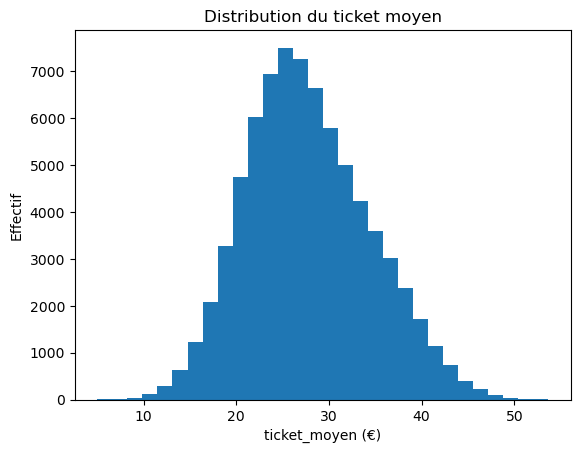

In [104]:
#Histogramme ticket_moyen
plt.figure()
plt.hist(df_rt['ticket_moyen'], bins=30)
plt.title('Distribution du ticket moyen')
plt.xlabel('ticket_moyen (€)')
plt.ylabel('Effectif')
plt.show()

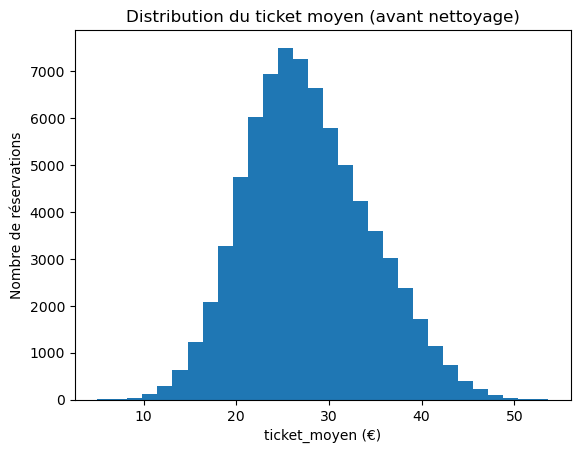

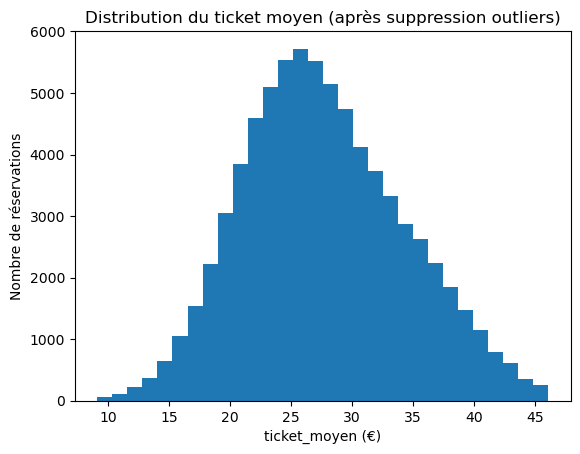

In [105]:
# 4.1 Histogramme ticket_moyen
plt.figure()
plt.hist(df_rt['ticket_moyen'], bins=30)
plt.title('Distribution du ticket moyen (avant nettoyage)')
plt.xlabel('ticket_moyen (€)')
plt.ylabel('Nombre de réservations')
plt.show()

plt.figure()
plt.hist(df_no_out['ticket_moyen'], bins=30)
plt.title('Distribution du ticket moyen (après suppression outliers)')
plt.xlabel('ticket_moyen (€)')
plt.ylabel('Nombre de réservations')
plt.show()

<Figure size 640x480 with 0 Axes>

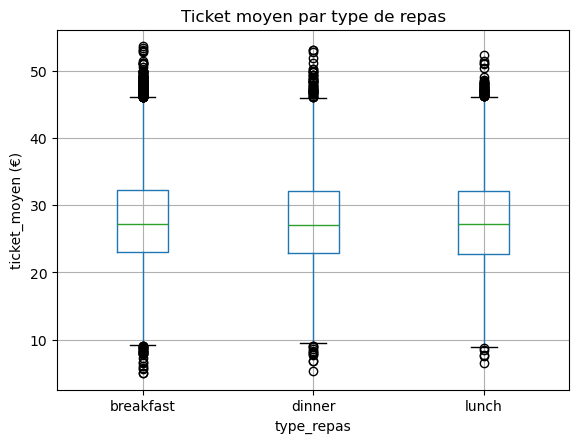

In [107]:
# Boxplot ticket_moyen par type_repas
plt.figure()
df_rt.boxplot(column='ticket_moyen', by='type_repas')
plt.title('Ticket moyen par type de repas')
plt.suptitle('')
plt.xlabel('type_repas')
plt.ylabel('ticket_moyen (€)')
plt.show()

Médiane (ligne verte)

Tous trois tournent autour de 27 € de ticket moyen : le petit‑déj, le déjeuner et le dîner génèrent grosso modo le même panier médian.

IQR – Quartiles (boîte bleue)

50 % des tickets pour chaque repas se situent entre 23 € et 32 € environ.

L’étendue interquartile est donc très similaire d’un type de repas à l’autre, montrant une dispersion comparable.

Moustaches

Elles descendent jusqu’à ~ 6–8 € (tickets très bas, par exemple café seul) et montent jusqu’à ~ 45 € pour la plupart des cas.

Cette plage couvre donc la quasi‑totalité de nos clients “standard”.

Outliers (cercles)

Au‑dessus de ~ 45 €, on voit des cercles : ce sont des dépenses exceptionnelles (par exemple menus dégustation, groupes, événements privés).

Ces outliers sont rares (< 5 % des cas) et peuvent être capés (ex. tout ticket > 60 € ramené à 60 €) ou analysés séparément si ce sont des événements à part.

<Figure size 640x480 with 0 Axes>

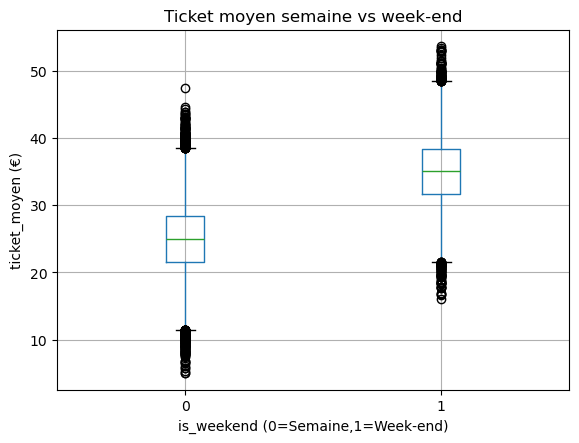

In [109]:
# Boxplot ticket_moyen semaine vs week-end
plt.figure()
df_rt.boxplot(column='ticket_moyen', by='is_weekend')
plt.title('Ticket moyen semaine vs week-end')
plt.suptitle('')
plt.xlabel('is_weekend (0=Semaine,1=Week-end)')
plt.ylabel('ticket_moyen (€)')
plt.show()

Analyse des dépenses au restaurant : semaine vs week-end

Médianes (ligne verte)

En semaine, la dépense médiane est d’environ 25 €.

Le week-end, elle est autour de 35 €.

 Les clients dépensent en moyenne 10 € de plus le week-end.

Boîte bleue (IQR – zone où se trouvent 50 % des tickets)

Semaine : la moitié des clients paient entre 22 € et 28 €.

Week-end : entre 32 € et 38 €.

 
Les dépenses sont plus élevées et plus homogènes le week-end, signe d’une activité plus stable et soutenue.

Moustaches (valeurs extrêmes normales)

En semaine : les dépenses varient de 6 € à 42 €.

Week-end : de 18 € à 52 €.

 Les dépenses les plus basses sont plus élevées le week-end, et certains clients atteignent plus de 50 € (menus spéciaux, événements…).

Valeurs extrêmes (outliers)

En semaine : quelques tickets > 42 € (groupes, événements).

Week-end : certains > 52 € (menus dégustation, occasions).
 
 On peut :

Les garder pour étudier les cas spéciaux.

Limiter  à 60 € si on veut se concentrer sur les clients “classiques”.

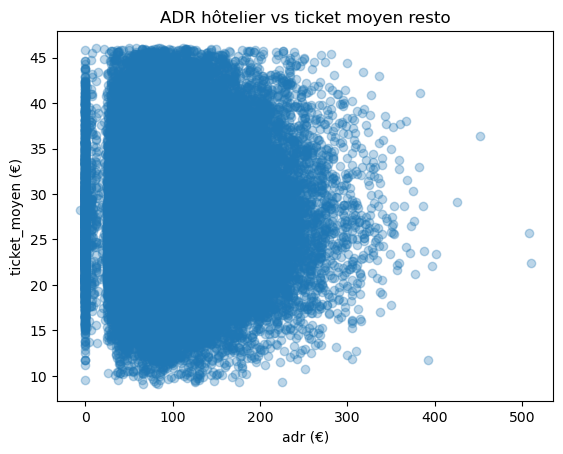

In [111]:

# 4.4 Scatter ADR vs ticket_moyen
plt.figure()
plt.scatter(df_no_out['adr'], df_no_out['ticket_moyen'], alpha=0.3)
plt.title('ADR hôtelier vs ticket moyen resto')
plt.xlabel('adr (€)'); plt.ylabel('ticket_moyen (€)')
plt.show()


 un tarif chambre élevé n’implique pas forcément une grosse dépense au resto.

Zone centrale (ADR 80–200 €, ticket 20–40 €) = clientèle principale  à cibler pour les offres.

Cas extrêmes (ADR > 400 € ou ticket > 45 €) = clients VIP  à traiter à part ou exclure des modèles.

Pour prédire ticket_moyen, il faut prioriser : type_repas, is_weekend, covers plutôt que ADR.

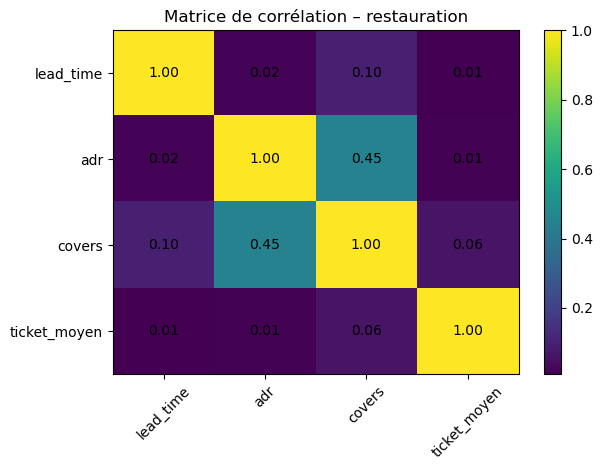

In [112]:
# 4.5 Matrice de corrélation
corr = df_no_out[['lead_time','adr','covers','ticket_moyen']].corr()
fig, ax = plt.subplots()
im = ax.imshow(corr, aspect='auto')
plt.colorbar(im, ax=ax)
ax.set_xticks(range(len(corr))); ax.set_xticklabels(corr.columns, rotation=45)
ax.set_yticks(range(len(corr))); ax.set_yticklabels(corr.index)
for i in range(len(corr)):
    for j in range(len(corr)):
        ax.text(j, i, f"{corr.iloc[i,j]:.2f}", ha='center', va='center')
plt.title('Matrice de corrélation – restauration')
plt.tight_layout()
plt.show()

In [115]:
# 5. Modélisation – Régression linéaire multiple
#    Features : adr, covers, is_weekend, type_repas
X = pd.get_dummies(df_no_out[['adr','covers','is_weekend','type_repas']], drop_first=True)
y = df_no_out['ticket_moyen']

In [116]:

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [117]:
# Entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [118]:
from sklearn.model_selection import cross_val_score
r2s = cross_val_score(model, X, y, scoring='r2', cv=5)
print("R² CV moyen :", r2s.mean())


R² CV moyen : 0.43767736870425633


In [119]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prédictions & évaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae:.2f} €")
print(f"RMSE : {rmse:.2f} €")
print(f"R² : {r2:.2f}")

MAE : 3.95 €
RMSE : 4.94 €
R² : 0.43


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


MAE = 3.95 €

 En moyenne, l'erreur entre les prévisions et les vraies dépenses resto est d’environ 4 €.

RMSE = 4.94 €
 
  Les erreurs plus importantes (écarts extrêmes) sont un peu pénalisées. Cela reste acceptable.

R² = 0.43
  Le modèle explique 43 % de la variation des dépenses au restaurant. C’est modérément satisfaisant, mais améliorable.

In [120]:
###### Coefficients du modèle
coeffs = pd.Series(model.coef_, index=X.columns).sort_values(key=abs, ascending=False)
print("\nCoefficients de régression :")
print(coeffs)


Coefficients de régression :
is_weekend           9.869094
type_repas_dinner   -0.052001
type_repas_lunch    -0.024981
covers               0.002034
adr                  0.000011
dtype: float64


Objectif du modèle
Le but de ce modèle est de prédire le ticket moyen au restaurant (dépense moyenne par réservation), en fonction de plusieurs facteurs (En week-end, type de repas, nombre de couverts, tarif hôtelier).

 Interprétation des coefficients
Dans une régression linéaire multiple, chaque coefficient représente l’impact moyen d’une variable sur le ticket moyen, toutes choses égales par ailleurs.
Cela signifie : en gardant constantes toutes les autres variables du modèle.

 is_weekend = +9.87 €

 Si la réservation a lieu le week-end (samedi ou dimanche), le ticket moyen augmente en moyenne de 9,87 €,
toutes choses égales par ailleurs.
Cela suggère que les clients dépensent beaucoup plus au restaurant pendant le week-end, probablement pour des repas plus longs ou festifs.

type_repas_dinner = –0.05 €

 Lorsqu’on prend un dîner, cela fait baisser légèrement le ticket moyen de 0,05 € par rapport au petit-déjeuner (la catégorie de référence).
Toutes choses égales par ailleurs, ce résultat semble contre-intuitif, mais la différence est très faible et probablement non significative statistiquement.

type_repas_lunch = –0.025 €

 Même interprétation : un déjeuner entraîne une baisse moyenne de 0,025 € du ticket moyen par rapport au petit-déjeuner.
Cela pourrait être dû à une formule déjeuner ou une clientèle plus pressée, mais ici encore l'effet est minime.

covers = +0.002 € par personne

 Chaque personne supplémentaire (adulte, enfant ou bébé) augmente très légèrement le ticket moyen de 0,002 €.
Ce coefficient est quasiment nul, donc le nombre de couverts n’a pas un effet significatif sur le ticket moyen dans ce modèle.

 adr (Average Daily Rate) = +0.000011 € par euro dépensé à l’hôtel

 Pour chaque 1 € de plus dans le tarif hôtelier journalier, le ticket moyen augmente de 0,000011 €,
toutes choses égales par ailleurs.
Autrement dit, il y a une corrélation extrêmement faible entre le tarif de la chambre et la dépense au restaurant. Cela pourrait signifier que les clients “premium” ne consomment pas forcément plus en restauration, ou que d’autres facteurs influencent davantage leur comportement.

 Conclusion
Le facteur week-end est de loin le plus impactant : on constate une nette augmentation des dépenses en restauration le samedi et dimanche.
Les types de repas ont un effet très faible voire négligeable, par rapport au petit-déjeuner.
Les variables covers et adr ont un impact minimal, voire négligeable sur le ticket moyen.
En résumé, toutes choses égales par ailleurs, le week-end est un levier essentiel pour anticiper une hausse des recettes restaurant.

###
### Préparation des données et entraînement des modèles
*** j'ai préferé garder ce workflow à part et ne pas intégrer chaque partie dans son model pour vous donner une idée sur la chronologie de la réalisation de ce rapport*** 

– On transforme les variables catégorielles en variables numériques et on garde telles quelles les variables numériques importantes: lead_time, adr, covers, is_weekend.

– On crée deux ensembles de données :

X_ns (features) et y_ns (cible) pour prédire si une réservation sera annulée (no-show).

X_rt (features) et y_rt (cible) pour prédire le ticket moyen dépensé au restaurant.

– Sur le jeu X_ns, y_ns, on entraîne deux modèles :

Régression logistique

Random Forest

Leurs prédictions (probabilités de no-show) sont enregistrées dans les colonnes Pred_Logit et Pred_RF.

– Ensuite, on nettoie X_rt et y_rt en supprimant les lignes contenant des valeurs manquantes (NaN).

Cela donne X_clean et y_clean, qui servent à entraîner une régression linéaire pour estimer le ticket moyen.

Le résultat est stocké dans une nouvelle colonne appelée Pred_Ticket.

In [125]:
df.to_csv('/Users/ottorina/Desktop/projet-final dataset/DataSet test/mon_nouveau_fichier.csv', index=False)

In [126]:
# Pour le no‑show
X_ns = pd.get_dummies(df[['lead_time','adr','is_weekend','distribution_channel','hotel']], drop_first=True)
y_ns = df['is_canceled']
# Pour le ticket moyen
X_rt = pd.get_dummies(df[['adr','covers','is_weekend','type_repas']], drop_first=True)
y_rt = df['ticket_moyen']


In [127]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000).fit(X_ns, y_ns)
df['Pred_Logit'] = log.predict_proba(X_ns)[:,1]


In [128]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_ns, y_ns)
df['Pred_RF'] = rf.predict_proba(X_ns)[:,1]


In [129]:
# 1. Création du masque pour garder uniquement les lignes sans aucun NaN
mask = X_rt.notna().all(axis=1)  

# 2. Filtrage des features et de la cible
X_clean = X_rt.loc[mask]
y_clean = y_rt.loc[mask]

# 3. Vérification rapide :  
print(f"Avant filtrage : {X_rt.shape[0]} lignes, Après : {X_clean.shape[0]} lignes")

# 4. Entraînement sur les données propres
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# ATTENTION ici on utilise bien X_clean et y_clean, PAS X_rt, y_rt
lr.fit(X_clean, y_clean)

# 5. Prédiction (et sauvegarde dans le DataFrame original, si tu veux toutes les lignes)
df.loc[X_clean.index, 'Pred_Ticket'] = lr.predict(X_clean)


Avant filtrage : 119390 lignes, Après : 119390 lignes


In [130]:
df.to_csv('/Users/ottorina/Desktop/projet-final dataset/DataSet test/Bookings.csv', index=False)


### Conclusion & Recommandations Métiers
Pour rendre ce projet opérationnel et orienté business, voici mes recommandations, simples et adaptées à des managers :

1.	Surbooking optimisé

	S’appuyer sur la probabilité de no show issue du Random Forest (lead_time, canal, type d’hôtel) pour définir un taux de surbooking 

dynamique par segment.

2.	Offres Package Chambre + Resto

	Haut panier (ticket_moyen > Q3) : proposer un package « dîner gourmet + nuitée » à –10 % pour maximiser la dépense globale.

	Bas panier (< Q1) : monter en gamme ou  faire des ventes incitative des petit déj ou boisson au bar pour augmenter le ticket moyen.

3.	Staffing & Approvisionnement

	Renforcer les équipes de restauration en week end (ticket moyen +10 €) et ajuster les commandes en fonction des prévisions de 

fréquentation (leads ≥ 100 jours génèrent plus d’annulations, prévoir des buffets flexibles).

4.	Suivi & Pilotage

  Mettre en place un dashboard Power BI avec :

	KPI : no show, ticket moyen, MAE, RMSE.

	Filtres : marque d’hôtel, canal, type repas, segment de ticket.

	Alertes automatiques si le no show dépasse un seuil ou si le ticket moyen chute de > 5 %.

5.	Améliorations futures

	Intégrer des avis clients (sentiment analysis) pour enrichir la prédiction de no show.

	Tester des modèles avancés .


## screen-shot du DASHBOARD Power BI.
je vais rajouter des screenShot de mon dashboard pour que vous puissiez le visualiser sans jongler entre le noteBook et powerBI

<div style="text-align:center; margin:20px 0;">
  <img src="Executive Overview 2025-07-30 à 11.41.33.png"
       alt="Executive Overview"
       width="800"
       style="border-radius:10px; box-shadow:0 4px 10px rgba(0,0,0,0.3);" />
</div>


<div style="text-align:center; margin:20px 0;">
  <img src="Analyse no-Show 2025-07-30 à 11.42.13.png"
       alt="Analyse no-Show"
       width="800"
       style="border-radius:10px; box-shadow:0 4px 10px rgba(0,0,0,0.3);" />
</div>


<div style="text-align:center; margin:20px 0;">
  <img src="Analyse Restaurant 2025-07-30 à 11.42.42.png"
       alt="Analyse Restaurant"
       width="800"
       style="border-radius:10px; box-shadow:0 4px 10px rgba(0,0,0,0.3);" />
</div>


<div style="text-align:center; margin:20px 0;">
  <img src="Modélisation et diagnostics 2025-07-30 à 11.45.23.png"
       alt="Modélisation & Diagnostics"
       width="800"
       style="border-radius:10px; box-shadow:0 4px 10px rgba(0,0,0,0.3);" />
</div>


<div style="text-align:center; margin:20px 0;">
  <img src="Capture d’écran 2025-07-30 à 15.07.40.png"
       alt="BIG ThANK'S"
       width="800"
       style="border-radius:10px; box-shadow:0 4px 10px rgba(0,0,0,0.3);" />
</div>
